# Positionnement des axes rotation sur la sphère de Bloch et valeurs de la moyenne sur les axes (Matrice de Pauli)
$$\mathcal{H}/\hbar=-\omega_I\hat{I}-\omega_x\hat{\sigma}_x/2-\omega_y\hat{\sigma}_y/2-\omega_z\hat{\sigma}_z/2.$$
Une fois que vous avez trouvé $\omega_x, \omega_y$ et $\omega_z$, vous pouvez fixer $\omega_I=0$ car cela déplace simplement les fréquences propres sans affecter la dynamique des états du qubit.

Dans la sphère de Bloch, les deux états propres correspondent alors au vecteur $|\phi_\pm\rangle=\pm\frac{1}{\sqrt{\omega_x^2+\omega_y^2+\omega_z^2}}(\omega_x,\omega_y,\omega_z)^T$, et les valeurs propres sont $\lambda_\pm=\mp\sqrt{\omega_x^2+\omega_y^2+\omega_z^2}/2$.

L'Hamiltonien fait tourner le qubit sur la sphère de Bloch autour de l'axe défini par $|\phi_\pm\rangle$ avec une fréquence angulaire $\omega=\lambda_--\lambda_+=\sqrt{\omega_x^2+\omega_y^2+\omega_z^2}$.

Dans la fonction suivante, nous considérons que $-\omega_I=0$

Voici votre texte avec les parties entre parenthèses correctement mises sous forme de vecteurs :

Les deux vecteurs propres sont :  

$\ket{\psi_{-}} = \begin{pmatrix} \cos(\theta/2) \\ \sin(\theta/2)e^{i\phi} \end{pmatrix}, \quad
\ket{\psi_{+}} = \begin{pmatrix} \sin(\theta/2) \\ -\cos(\theta/2)e^{i\phi} \end{pmatrix}$
en ayant considéré  

$\begin{pmatrix} \omega_x \\ \omega_y \\ \omega_z \end{pmatrix} = \sqrt{\omega_x^2+\omega_y^2+\omega_z^2} 
\begin{pmatrix} \sin(\theta)\cos(\phi) \\ \sin(\theta)\sin(\phi) \\ \cos(\theta) \end{pmatrix}.$

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import basis, sigmax, sigmay, sigmaz, mesolve, Bloch

##------Définition de la fonction------##


def simulate_qubit_rotation(omega_x, omega_y, omega_z):
    # Define the Hamiltonian
    H = -omega_x * sigmax() / 2 - omega_y * sigmay() / 2 - omega_z * sigmaz() / 2

    # Diagonalize the Hamiltonian
    eigvals, eigstates = H.eigenstates()
    print("Eigenvalues:", eigvals)
    freq_rotate = (eigvals[1] - eigvals[0]) / (2 * np.pi)  # frequency of rotation in Hz
    print("Frequency:", freq_rotate)
    period = 1 / freq_rotate
    print("Period:", period)

    # Define time list
    time_list = np.linspace(0, 2 * np.pi, 101)  # [2π / omega_z] time points normalized by qubit frequency

    # Define the initial state (|0⟩ state)
    psi0 = basis(2, 0)

    # Solve the Schrodinger equation
    result = mesolve(H=H, rho0=psi0, tlist=time_list, e_ops=[sigmax(), sigmay(), sigmaz()])

    # Plot the time evolution of the Bloch vector
    exp_x = result.expect[0]
    exp_y = result.expect[1]
    exp_z = result.expect[2]

    plt.plot(time_list, exp_x, label=r"$\langle\hat{X}\rangle$")
    plt.plot(time_list, exp_y, label=r"$\langle\hat{Y}\rangle$")
    plt.plot(time_list, exp_z, label=r"$\langle\hat{Z}\rangle$")

    # Plot the vertical line at the period of rotation
    plt.vlines(period, np.min(result.expect), np.max(result.expect), linestyles="dashed", colors="red")

    plt.legend(loc=0)
    plt.xlabel(r"Time [1/$f_q$]")
    plt.ylabel("Expectation value")
    plt.grid()
    plt.show()

    # Plot on the Bloch sphere
    b = Bloch()
    #b.view = [-30, 30] ##------ici on peut changer la position depuis laquelle on regarde la sphère [azimuth,élévation]------##
    b.make_sphere()

    # Plot the time trace of the state
    b.add_points(result.expect, meth="l", colors="red")

    # Plot the rotation angle (eigenstates of the Hamiltonian)
    b.add_states(eigstates)

    b.render()
    b.show()

Eigenvalues: [-0.70710678  0.70710678]
Frequency: 0.22507907903927654
Period: 4.442882938158366


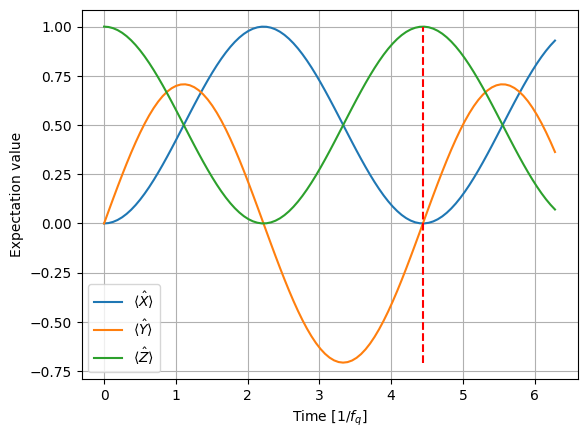

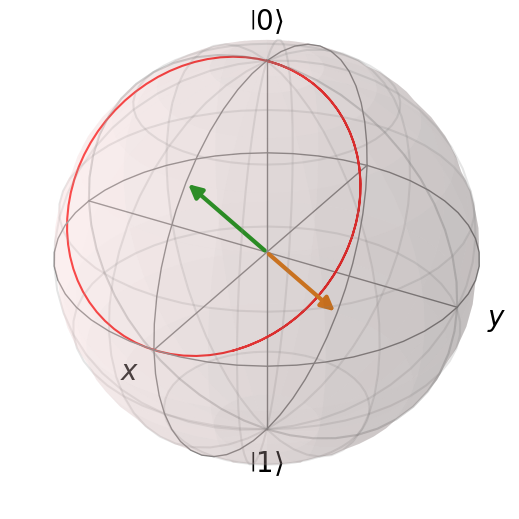

In [9]:
##------Appel de la fonction, paramètres : omega_x, omega_y, omega_z------##

simulate_qubit_rotation(omega_x=1, omega_y=0, omega_z=1)